In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
digits = datasets.load_digits()

In [12]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [13]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [15]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
digits.target[0]

0

In [17]:
digits.images[0].shape

(8, 8)

In [18]:
digits.data[0].shape

(64,)

In [3]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


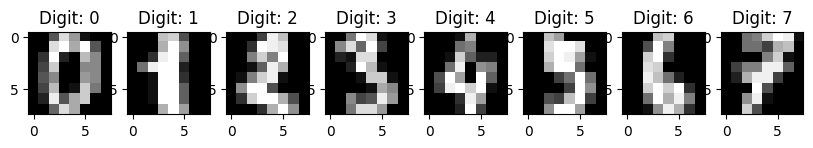

In [4]:
plt.figure(figsize=(10, 5))
for index, (image, label) in enumerate(zip(digits.data[:8], digits.target[:8])):
    plt.subplot(1, 8, index + 1)
    plt.imshow(image.reshape((8, 8)), cmap=plt.cm.gray)
    plt.title(f'Digit: {label}')
plt.show()

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(digits.data)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, digits.target, test_size=0.2, random_state=42)

In [7]:
svm_model = SVC(kernel='rbf', gamma=0.001, C=1.0)
svm_model.fit(X_train, y_train)


SVC(gamma=0.001)

In [8]:
y_pred = svm_model.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM: {accuracy * 100:.2f}%")


Accuracy of SVM: 93.89%


In [10]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.84      0.93      0.88        28
           2       0.94      0.94      0.94        33
           3       1.00      0.88      0.94        34
           4       1.00      1.00      1.00        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.83      0.83      0.83        30
           9       0.90      0.90      0.90        40

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



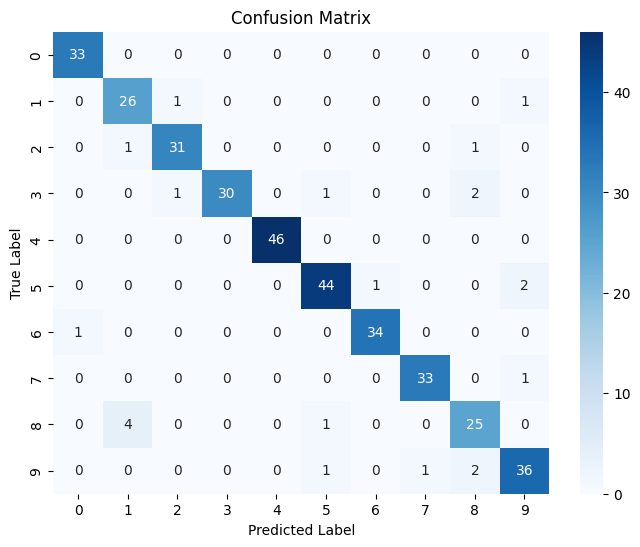

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()